

# Project: Investigate a Dataset - [noshow-appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● "ScheduledDay" tells us on what day the patient set up their appointment.
● "Neighborhood" indicates the location of the hospital.
● "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● "No-show" it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

#### Q1: How many patients show up in the appointments? And how many do not show up?
#### Q2: Does the show up affected by the patients who received SMS ?


In [638]:
# importing the packages that I need

import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns
import datetime as dt

%matplotlib inline


In [639]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Could not fetch URL https://pypi.org/simple/pandas/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pandas/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


ERROR: Could not find a version that satisfies the requirement pandas==0.25.0 (from versions: none)
ERROR: No matching distribution found for pandas==0.25.0


<a id='wrangling'></a>
## Data Wrangling
Starting with loading the data and see how the data looks like.


In [640]:
#here i load the csv into panda datafram 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [641]:
#here i start to show few lines
df.head(100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.986249e+14,5640307,M,2016-04-29T10:28:54Z,2016-04-29T00:00:00Z,1,BONFIM,0,0,0,0,0,0,No
96,7.937625e+13,5623692,M,2016-04-26T14:28:39Z,2016-04-29T00:00:00Z,3,BONFIM,0,0,0,0,0,1,No
97,5.253342e+12,5565493,F,2016-04-11T09:00:00Z,2016-04-29T00:00:00Z,35,BONFIM,0,0,0,0,0,1,No
98,3.725964e+14,5571906,F,2016-04-12T09:44:42Z,2016-04-29T00:00:00Z,51,BONFIM,0,0,0,0,0,1,No


In [642]:
df.shape


(110527, 14)

In [643]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We notice there are no missing values



In [644]:
#info function show if there null value, types of data , columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It looks like the data is well populated. There are no NULLs in any of the 14 columns. However the datatype for ScheduledDay and AppointmentDay is String. Also, the data type for PatientID is float. I will convert PatientID to Int and update datatype for date column to datetime.

In [645]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We notice that the average age of the patients is 37, and also there is a mistake in the minimum age because it can not be -1



In [646]:
#update PatientId datatype to int and date columns to date
df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay']=df['AppointmentDay'].astype('datetime64[ns]')

In [647]:
# confirm data type updates are done correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [648]:
# re-run head to make sure updated column values looks fine
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Cleaning


In [649]:
# fix columns names
df = df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap' : 'Handicap'})

In [650]:
df.sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
85256,1811854497849,5771203,M,2016-06-03 11:51:55,2016-06-03,16,CARATOÍRA,0,0,0,0,0,0,No
85561,191157672642255,5705569,F,2016-05-17 07:17:50,2016-06-02,47,SANTO ANTÔNIO,0,0,0,0,0,1,No
89301,4544254767858,5764901,M,2016-06-02 11:06:15,2016-06-02,31,MATA DA PRAIA,0,0,0,0,0,0,No


In [651]:
#fix data types
df.astype({'AppointmentID': 'str', 'PatientId' : 'str','ScheduledDay':'datetime64[ns]','AppointmentDay' : 'datetime64[ns]'}).dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
dtype: object

In [652]:
#Now I fix the negative age by replacing the mean

Avg_Age = df['Age'].mean()
df[df['Age'] <=0] = Avg_Age

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.425642e+14,5.493660e+06,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806
std,2.530289e+14,1.001764e+06,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885
min,3.708887e+01,3.708887e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.251883e+12,5.636216e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.697449e+13,5.678212e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.231455e+13,5.723640e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [653]:
df.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
5,9.598513e+13,5626772.0,F,2016-04-27 08:36:51,2016-04-29 00:00:00,76.0,REPÚBLICA,0.0,1.0,0.0,0.0,0.0,0.0,No
6,7.336882e+14,5630279.0,F,2016-04-27 15:05:12,2016-04-29 00:00:00,23.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,Yes
7,3.449833e+12,5630575.0,F,2016-04-27 15:39:58,2016-04-29 00:00:00,39.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,Yes
8,5.639473e+13,5638447.0,F,2016-04-29 08:02:16,2016-04-29 00:00:00,21.0,ANDORINHAS,0.0,0.0,0.0,0.0,0.0,0.0,No
9,7.812456e+13,5629123.0,F,2016-04-27 12:48:25,2016-04-29 00:00:00,19.0,CONQUISTA,0.0,0.0,0.0,0.0,0.0,0.0,No


In [654]:
#Here I'm saparating between the patients who come and not come to the appointments
Show_up = df['No-show'] == 'No'
Noshow_up = df['No-show'] == 'Yes'
df['Show_up'] = Show_up
df['Noshow_up'] = Noshow_up

In [655]:
#group by datediff and count number of records in each group
df_scheduled_appt_diff = df_cleaned_no_show.groupby(['datediff'])[['no-show']].count()
df_scheduled_appt_diff.reset_index(inplace = True)
df_scheduled_appt_diff.columns = ['datediff', 'count']

Text(0.5, 0, '# of days between scheduled and appointment')

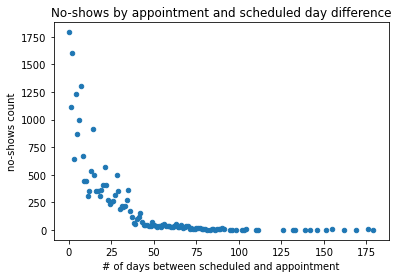

In [656]:
#visualize datediff and value count
df_scheduled_appt_diff.plot(x='datediff', y='count', kind='scatter')
plt.title('No-shows by appointment and scheduled day difference')
plt.ylabel("no-shows count")
plt.xlabel("# of days between scheduled and appointment")

Most of the no show appoitments are made very close to appoitment day. This does not give much information.



<a id='eda'></a>
## Exploratory Data Analysis

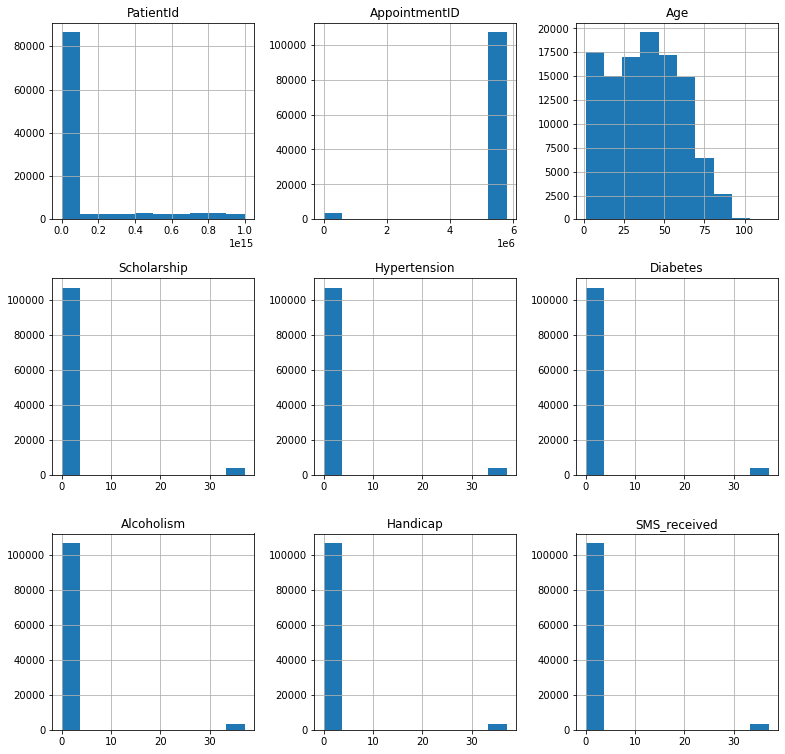

In [657]:
df.hist(figsize= (13,13));


### Q1: How many patients show up in the appointments? And how many do not show up?


Patients Show Up: 
77.18204601590561

Patients Not Show Up: 
22.817953984094384


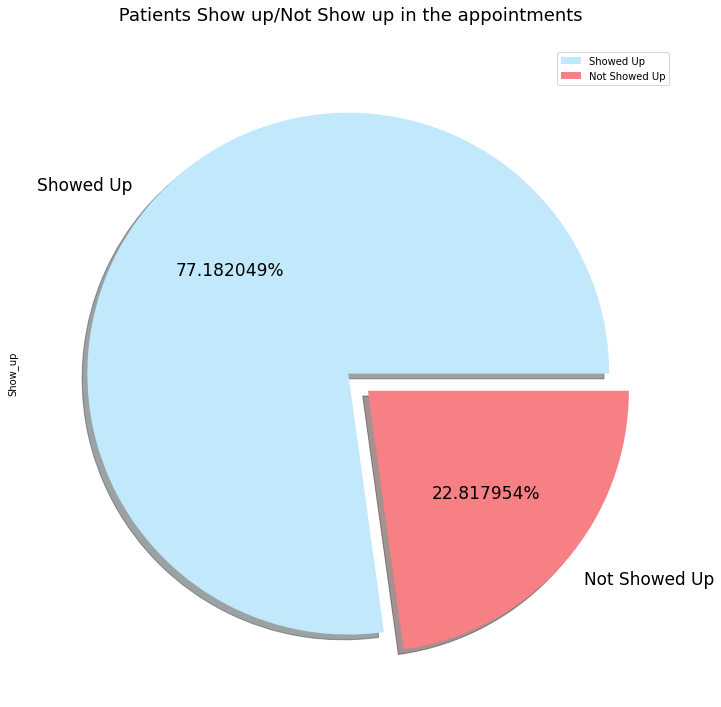

In [658]:
# Exploring using the Pie Chart 

Patient_showUp = df['Show_up'].value_counts()

def Pshow():
    print(Patient_showUp[1] / Patient_showUp.sum() * 100)

def PNotshow():
    print(Patient_showUp[0] / Patient_showUp.sum() * 100)

print('Patients Show Up: ')
Pshow()
print('\nPatients Not Show Up: ')
PNotshow()
labels =['Showed Up','Not Showed Up']
colors = ['#c2e9fb','#f68084']
explode = (0, 0.1)
chart = Patient_showUp.plot.pie(figsize=(12,12), autopct='%2f%%', fontsize = 17,colors=colors,explode=explode,labels=labels, shadow=True);
chart.set_title(' Patients Show up/Not Show up in the appointments\n', fontsize = 18);
mtp.legend()

We notice that in the figure above, the patients who come to the appointments are more than the patients who did not show up.



### Q2: Does the show up affected by the patients who received SMS ?


Text(0, 0.5, 'Patients')

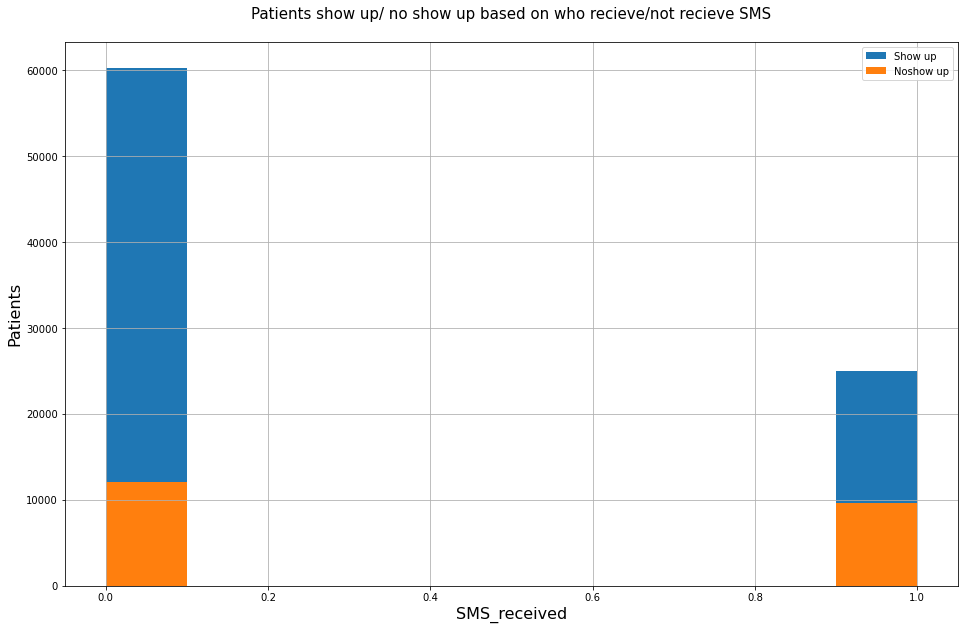

In [659]:
mtp.figure(figsize=[16,10])

df.SMS_received[Show_up].hist(alpha=1,label='Show up')
df.SMS_received[Noshow_up].hist(alpha=1,label='Noshow up')
mtp.legend()
mtp.title('Patients show up/ no show up based on who recieve/not recieve SMS\n',fontsize=15)
mtp.xlabel('SMS_received',fontsize=16)
mtp.ylabel('Patients',fontsize=16)

As we can see here in the figure above, patients who did not recieve SMS is showed up more than the patients who recieved SMS, Which I think It does not make sense.



Text(0.5, 1.0, 'Relationship between the characteristics\n')

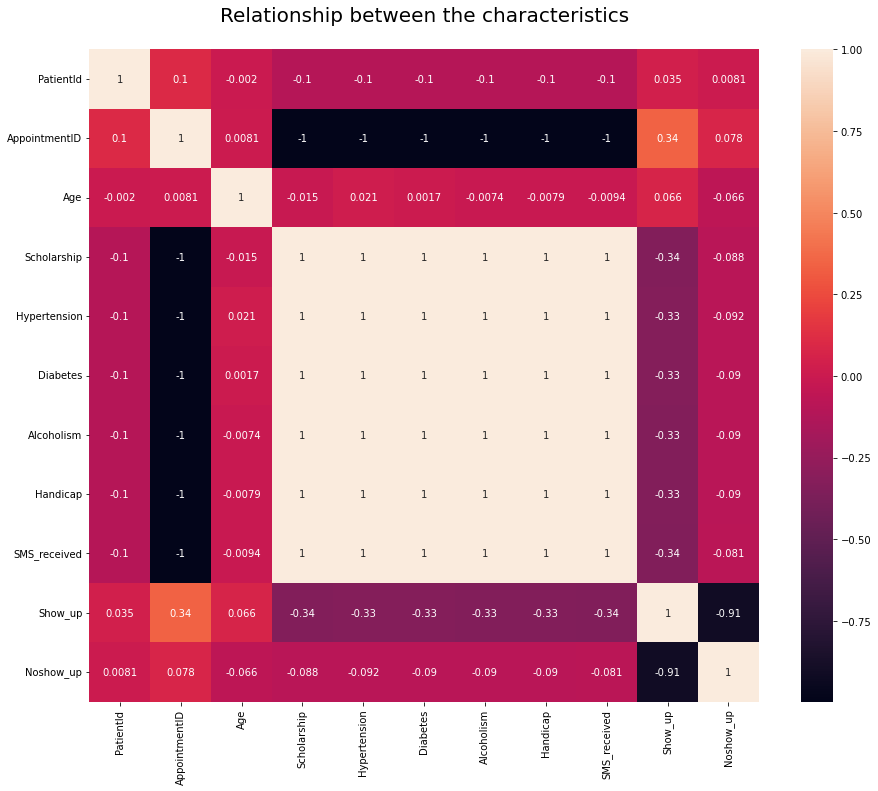

In [660]:
# Heatmap to show the correlation 
mtp.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True);

mtp.title('Relationship between the characteristics\n', fontsize = 20)

<a id='conclusions'></a>
## Conclusions
Finally, the analysis shows that about 80% of patients show up to the appointments,whereas 20% of them did not show up.
Also, the analysis shows that patients who receive SMS show up to the appointments less than who did not receive SMS.

## Limitation:


There is a limitation which is, I could not have the relationship between the gender and the patients who show and not show up.

In [661]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1